<a href="https://colab.research.google.com/github/DevRichan/API-Authentication-with-JWT-NodeJS-MongoDB-/blob/master/Data_Analysis_Covid19_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Library
import json
import numpy as np
import pandas as pd
import requests

In [2]:
# Function GET API
def get_json(api_url):
    response = requests.get(api_url)
    if response.status_code == 200 :
        return json.loads(response.content.decode('utf-8'))
    else:
        None

In [3]:
# Call API (date)
record_date = '2020-08-17'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))
print(df_covid_worldwide.head(5))

  country          last_update    cases  deaths  recovered
0      US  2020-08-16T23:27:50  5401167  170019    1833067
1      BR  2020-08-16T23:27:50  3340197  107852    2655017
2      IN  2020-08-16T23:27:50  2589682   49980    1862258
3      RU  2020-08-16T23:27:50   920719   15653     731444
4      ZA  2020-08-16T23:27:50   587345   11839     472377


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


In [4]:
# Change date format 1
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide.head(5)

,country,last_update,cases,deaths,recovered
0,US,2020-08-16 23:27:50,5401167,170019,1833067
1,BR,2020-08-16 23:27:50,3340197,107852,2655017
2,IN,2020-08-16 23:27:50,2589682,49980,1862258
3,RU,2020-08-16 23:27:50,920719,15653,731444
4,ZA,2020-08-16 23:27:50,587345,11839,472377


In [5]:
# Change date format 2
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())
df_covid_worldwide.head(5)

,country,last_update,cases,deaths,recovered
0,US,2020-08-16,5401167,170019,1833067
1,BR,2020-08-16,3340197,107852,2655017
2,IN,2020-08-16,2589682,49980,1862258
3,RU,2020-08-16,920719,15653,731444
4,ZA,2020-08-16,587345,11839,472377


In [6]:
# Call API Countries
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]

print(df_countries.head())

          name country
0  Afghanistan      AF
1      Albania      AL
2      Algeria      DZ
3      Andorra      AD
4       Angola      AO


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# Merge data and countries
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')
print(df_covid_denormalized.head(5))

  country last_update    cases  deaths  recovered                      name
0      US  2020-08-16  5401167  170019    1833067  United States of America
1      BR  2020-08-16  3340197  107852    2655017                    Brazil
2      IN  2020-08-16  2589682   49980    1862258                     India
3      RU  2020-08-16   920719   15653     731444        Russian Federation
4      ZA  2020-08-16   587345   11839     472377              South Africa


In [8]:
# Add fatality_ratio table for each country
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']
# print(df_covid_denormalized['deaths'].head(2))
# print(df_covid_denormalized['cases'].head(2))
print(df_covid_denormalized.head(5))

  country last_update  ...                      name  fatality_ratio
0      US  2020-08-16  ...  United States of America        0.031478
1      BR  2020-08-16  ...                    Brazil        0.032289
2      IN  2020-08-16  ...                     India        0.019300
3      RU  2020-08-16  ...        Russian Federation        0.017001
4      ZA  2020-08-16  ...              South Africa        0.020157

[5 rows x 7 columns]


In [9]:
# Countries with the Highest Fatality Ratio
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio',ascending=False).head(20)
df_top_20_fatality_rate

,country,last_update,cases,deaths,recovered,name,fatality_ratio
134,YE,2020-08-16,1869,530,1013,Yemen,0.283574
11,GB,2020-08-16,320343,46791,1486,United Kingdom of Great Britain and Northern I...,0.146065
16,IT,2020-08-16,253915,35396,203786,Italy,0.139401
36,BE,2020-08-16,77869,9935,17981,Belgium,0.127586
105,HU,2020-08-16,4916,608,3623,Hungary,0.123678
17,FR,2020-08-16,252965,30410,83993,France,0.120214
6,MX,2020-08-16,517714,56543,418164,Mexico,0.109217
191,EH,2020-08-16,10,1,8,Western Sahara,0.100000
40,NL,2020-08-16,64451,6194,345,Netherlands,0.096104
10,ES,2020-08-16,342813,28617,150376,Spain,0.083477


In [10]:
# Data Visualization
import matplotlib.pyplot as plt

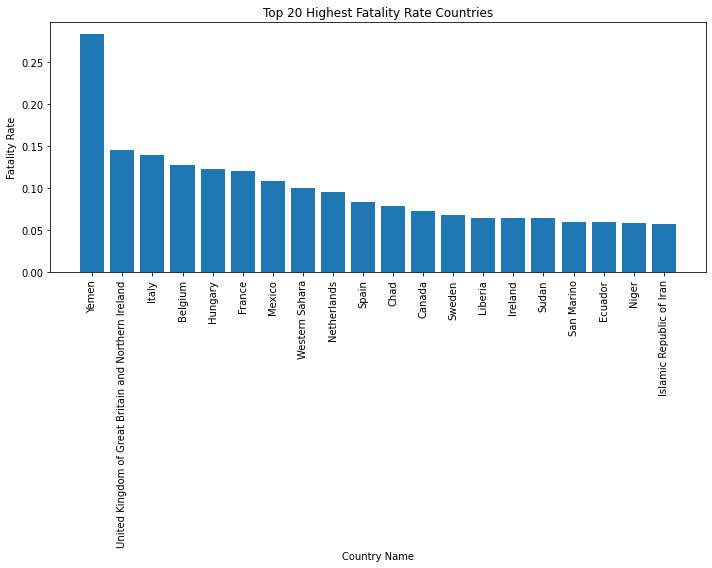

In [11]:
#Using Bar Chart
plt.figure(figsize=(10,8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

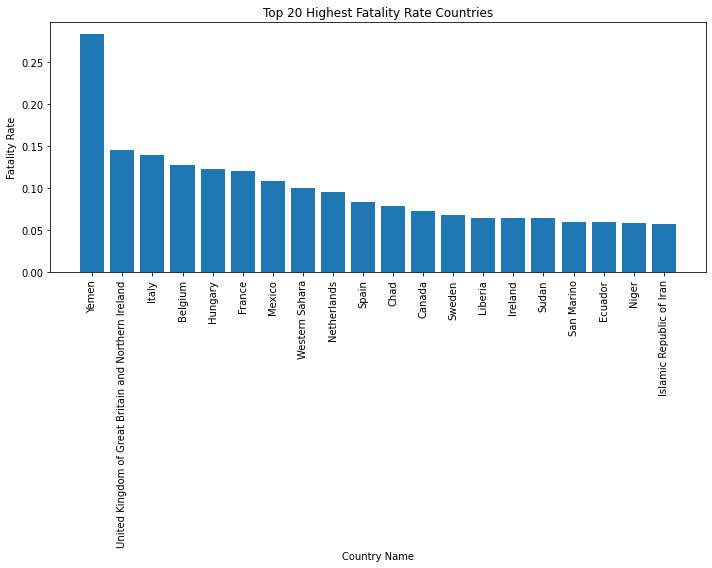

In [12]:
#Using Bar Chart
plt.figure(figsize=(10,8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [13]:
# Futhermore, comparing the covid19 cases in indonesia with neighboring countries,namely:
# ME -> Malaysia,
# SG -> Singapore,
# TH -> Thailand,
# VN -> Vietnam.

countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
    covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
    df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
    df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
    df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
    
    if i == 0 :
        df_covid_timeline_merged = df_covid_timeline
    else:
        df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
    i += 1
print(df_covid_timeline_merged.head())

  country last_update  cases  deaths  recovered
0      VN  2020-08-28   1036      30        637
1      VN  2020-08-27   1036      30        637
2      VN  2020-08-26   1034      29        632
3      VN  2020-08-25   1029      27        592
4      VN  2020-08-24   1022      27        587


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # This is added back by InteractiveShellApp.init_path()


In [14]:
## Merge covid data with country data
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')
df_covid_timeline_denormalized 

,country,last_update,cases,deaths,recovered,name
0,VN,2020-08-28,1036,30,637,Viet Nam
1,VN,2020-08-27,1036,30,637,Viet Nam
2,VN,2020-08-26,1034,29,632,Viet Nam
3,VN,2020-08-25,1029,27,592,Viet Nam
4,VN,2020-08-24,1022,27,587,Viet Nam
...,...,...,...,...,...,...
973,ID,2020-03-10,27,0,2,Indonesia
974,ID,2020-03-09,19,0,0,Indonesia
975,ID,2020-03-08,6,0,0,Indonesia
976,ID,2020-03-06,4,0,0,Indonesia


In [18]:
# Covid-19 cases in March 2020
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020,3,1))]
df_covid_timeline_denormalized

,country,last_update,cases,deaths,recovered,name
0,VN,2020-08-28,1036,30,637,Viet Nam
1,VN,2020-08-27,1036,30,637,Viet Nam
2,VN,2020-08-26,1034,29,632,Viet Nam
3,VN,2020-08-25,1029,27,592,Viet Nam
4,VN,2020-08-24,1022,27,587,Viet Nam
...,...,...,...,...,...,...
973,ID,2020-03-10,27,0,2,Indonesia
974,ID,2020-03-09,19,0,0,Indonesia
975,ID,2020-03-08,6,0,0,Indonesia
976,ID,2020-03-06,4,0,0,Indonesia


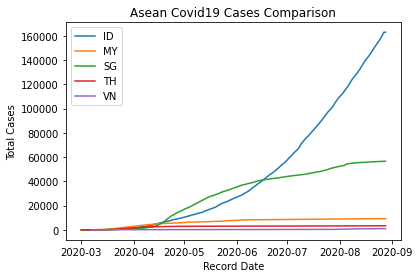

In [19]:
plt.clf()
countries = ['ID','MY','SG','TH','VN']
for country in countries:
    country_data = df_covid_timeline_denormalized['country']== country
    x = df_covid_timeline_denormalized[country_data]['last_update']
    y = df_covid_timeline_denormalized[country_data]['cases']
    plt.plot(x,y,label=country)
    
plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')
plt.show()